In [2]:
import csv
import itertools
from collections import namedtuple

Noun = namedtuple("Noun", "word ipm zhu_coeff")

nouns = []
with open('freqrnc2011.csv', newline='') as csvfile:
    for row in csvfile:
        print(type(row), row)
        row_arr = row.split(',')
        if row_arr[1] == 's':
            nouns.append(Noun(row_arr[0], row_arr[2], row_arr[4]))

print(nouns[:3])

<class 'str'> Lemma,PoS,Freq(ipm),R,D,Doc

<class 'str'> а,conj,8198.0,100,97,32332

<class 'str'> а,intj,19.8,99,90,757

<class 'str'> а,part,6.1,59,79,128

<class 'str'> а,s,2.7,59,85,160

<class 'str'> аа,intj,1.5,47,80,68

<class 'str'> а-а,intj,17.8,79,74,627

<class 'str'> ааа,intj,1.1,37,78,61

<class 'str'> а-а-а,intj,6.7,76,79,325

<class 'str'> а-а-а-а,intj,0.8,35,82,54

<class 'str'> абажур,s,4.9,79,90,269

<class 'str'> аббат,s,1.6,44,79,63

<class 'str'> аббатство,s,0.9,33,77,40

<class 'str'> аббревиатура,s,3.5,83,91,239

<class 'str'> абвер,s,2.7,22,38,25

<class 'str'> Абдулла,s.PROP,4.4,32,55,50

<class 'str'> аберрация,s,0.7,36,79,50

<class 'str'> абзац,s,10.2,99,87,478

<class 'str'> абитуриент,s,4.0,78,88,193

<class 'str'> абонемент,s,1.8,59,87,118

<class 'str'> абонементный,a,0.4,24,76,30

<class 'str'> абонент,s,10.6,87,83,321

<class 'str'> абонентский,a,2.5,53,81,127

<class 'str'> абордаж,s,0.5,38,85,44

<class 'str'> абориген,s,5.8,86,82,255

<class 'str'> 

In [3]:
sorted_nouns = sorted(nouns, key=lambda noun: noun.zhu_coeff, reverse=True)
easy_nouns = sorted_nouns[:2000]
med_words = sorted_nouns[2000:5000]

In [4]:
import random
from py_linq import Enumerable
seed = 5
random.seed(seed)
random.shuffle(easy_nouns)
random.shuffle(med_words)

In [5]:
# print(Enumerable(easy_words[:50]).select(lambda n: n.word).to_list())
# print(Enumerable(med_words[:50]).select(lambda n: n.word).to_list())
# print([noun.word for noun in random.sample(sorted_nouns[2000:5000], 20)])
# print(random.sample(sorted_nouns[5000:10000], 20))

In [6]:
# how many long words?
print(len(nouns))
long_words = Enumerable(nouns).where(lambda noun: len(noun.word) > 20).to_list()
long_words = sorted(long_words, key=lambda noun: noun.zhu_coeff, reverse=True)
long_words

22050


[Noun(word='достопримечательность', ipm='6.1', zhu_coeff='93'),
 Noun(word='самосовершенствование', ipm='1.1', zhu_coeff='85'),
 Noun(word='самоусовершенствование', ipm='0.5', zhu_coeff='83'),
 Noun(word='конкурентоспособность', ipm='10.5', zhu_coeff='77'),
 Noun(word='высокопревосходительство', ipm='0.8', zhu_coeff='56')]

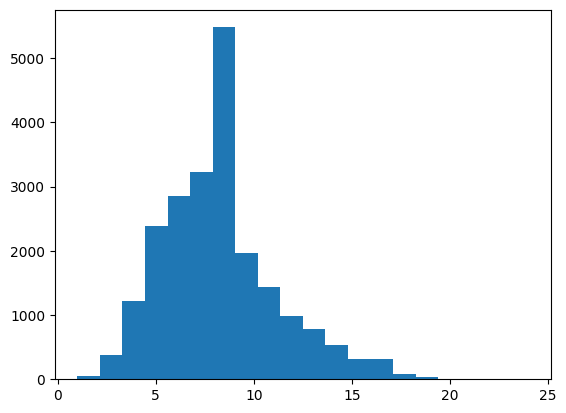

In [71]:
import matplotlib.pyplot as plt

length_dist = [len(noun.word) for noun in nouns]
plt.hist(length_dist, bins=20)
plt.show()

In [72]:
# generating latex file for the actual words
output_file = '../hat-game-latex/src/input.tex'
with open(output_file, 'w') as out:
    # Iterate over each line in the source file
    for noun in easy_nouns[:200]:
        # Strip any leading/trailing whitespace and append the greeting
        word = noun.word.strip()
        line = f'{word} \\newpage\n'
        # Write the modified line to the output file
        out.write(line)